<a href="https://colab.research.google.com/github/tulsip03/knn/blob/main/knn_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**
completed question 0, 1, and 4

`! git clone https://github.com/DS3001/knn`

**Q0.**
1. What is the difference between regression and classification?

  Regression means using features to predict a numerical outcome and classification means using features to predict a categorical outcome.

2. What is a confusion table? What does it help us understand about a model's performance?

  A confusion table is a table that cross-tabulates the actual and predicted values which shows where the model correctly predicted class labels and also shows what errors were made when it predicted incorrectly. It helps us understand how accurate the model's performance is and how to correct it in order to increase accuracy

3. What does the SSE quantify about a particular model?

  The SSE quantifies the total squared difference between the actual and predicted values.

4. What are overfitting and underfitting?

  overfitting is when the model fits the training data too well, to the point that it can no longer acurately generlize to new data it has been given. underfitting is when a model is too simple and can't find patterns in the data to predict outcomes when given new data.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

  It improves model performace because we can see if the model can actually pick up patterns in old data and apply it to real world instances in the new data. This helps us gague the quality of it's performance.

6. Why does splitting the data into training and testing sets, and choosing
 by evaluating accuracy or SSE on the test set, improve model performance?

 With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

7. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

  The strengths of the classification is that they are easy to interperet but the weakness is that we wouldnt be able to differentiate the exact difference in accuracy between the two predictions.

**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.

In [7]:
import numpy as np
import pandas as pd
from google.colab import files

uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

df = df.loc[:,['price','year','mileage'] ]
print(df.shape)
print(df.describe())
df.head()

Saving USA_cars_datasets.csv to USA_cars_datasets.csv
(2499, 3)
              price         year       mileage
count   2499.000000  2499.000000  2.499000e+03
mean   18767.671469  2016.714286  5.229869e+04
std    12116.094936     3.442656  5.970552e+04
min        0.000000  1973.000000  0.000000e+00
25%    10200.000000  2016.000000  2.146650e+04
50%    16900.000000  2018.000000  3.536500e+04
75%    25555.500000  2019.000000  6.347250e+04
max    84900.000000  2020.000000  1.017936e+06


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


2. Maxmin normalize `year` and `mileage`.


In [9]:
def maxmin(x):
    mm = (x-min(x))/(max(x)-min(x))
    return mm

df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

3. Split the sample into ~80% for training and ~20% for evaluation.


In [13]:
from sklearn.model_selection import train_test_split
y = df['price']
x = df.drop('price', axis = 1 )
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=.2, random_state=100 )

4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?


The range of predicted values flattens, and the variability of predictions onditional on price shrinks.

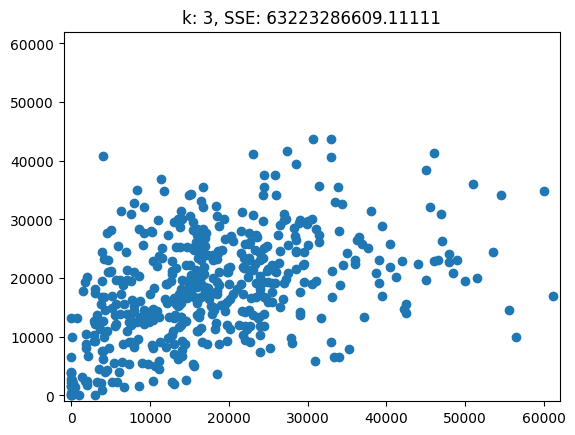

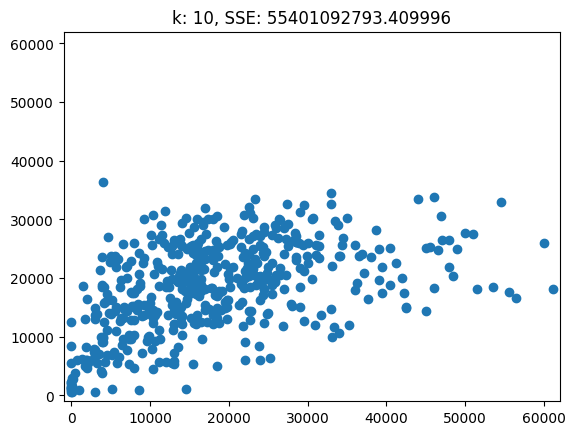

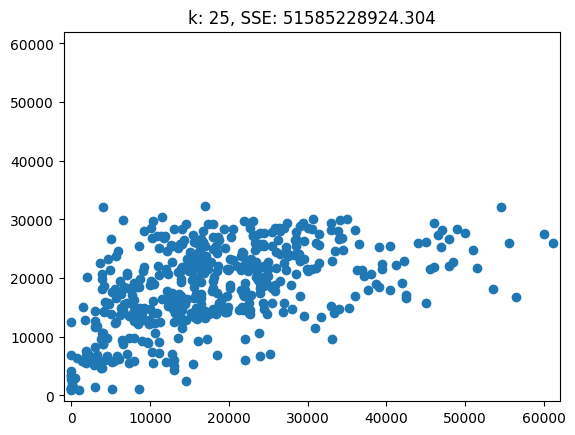

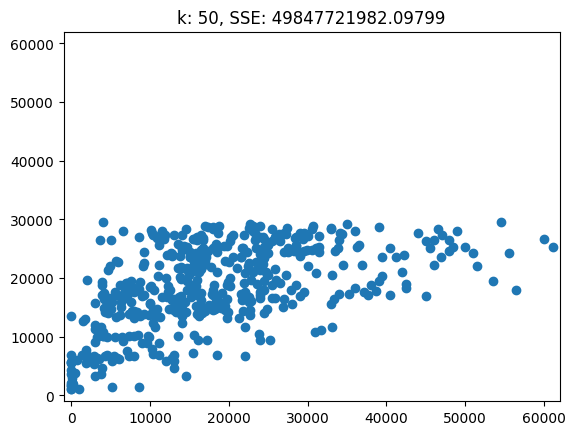

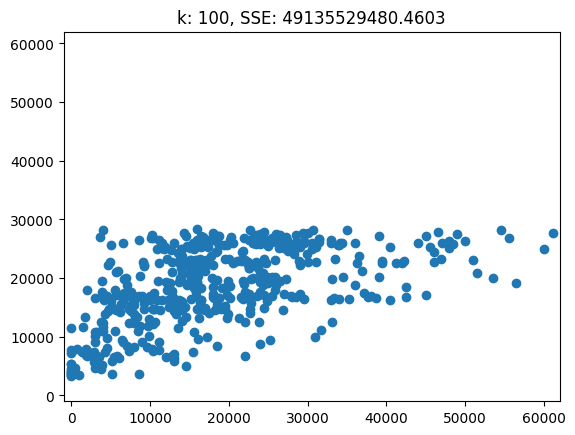

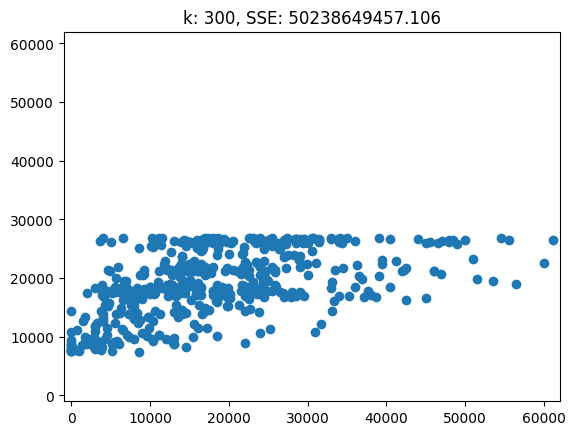

In [15]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

for k in [3,10,25,50,100,300]: # used k values in example
    model = KNeighborsRegressor( n_neighbors=k ).fit( x_train,y_train )
    y_hat = model.predict( x_test )
    SSE = np.sum( (y_test-y_hat)**2 )
    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', SSE: '+str(SSE))
    axes.set_ylim(-1000, 62000)
    axes.set_xlim(-1000, 62000)
    plt.show()

5. Determine the optimal 𝑘 for these data.

[77]


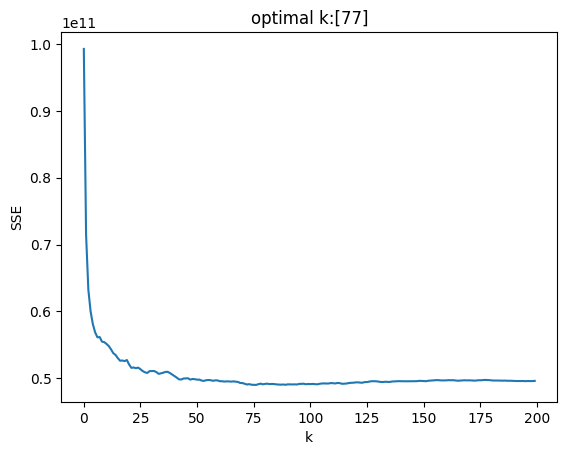

In [16]:
k_bar = 200
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE)
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('SSE')
plt.show()

6. Describe what happened in the plots of predicted versus actual prices as 𝑘
 varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)


The optimal value for k is around 77, so using k = 300 likely results in overfitting which would make the function not applicable to other datasets. There is a horizontal bunching effect which shows an overly even distributions. K being 3, 10, or 25 could lead to underfitting and inaccurate predictions. They could also produce predictions with high variance and low precision. For k = 50 and k = 100, the results are close. As k increases, the range of predictions narrows outliers lose their influence, and predictions converge towards the average.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.

Saving land_mines.csv to land_mines.csv
(338, 4)
    voltage    height  soil  mine_type
0  0.338157  0.000000   0.0          1
1  0.320241  0.181818   0.0          1
2  0.287009  0.272727   0.0          1
3  0.256284  0.454545   0.0          1
4  0.262840  0.545455   0.0          1
          voltage      height        soil   mine_type
count  338.000000  338.000000  338.000000  338.000000
mean     0.430634    0.508876    0.503550    2.952663
std      0.195819    0.306043    0.344244    1.419703
min      0.197734    0.000000    0.000000    1.000000
25%      0.309737    0.272727    0.200000    2.000000
50%      0.359516    0.545455    0.600000    3.000000
75%      0.482628    0.727273    0.800000    4.000000
max      0.999999    1.000000    1.000000    5.000000


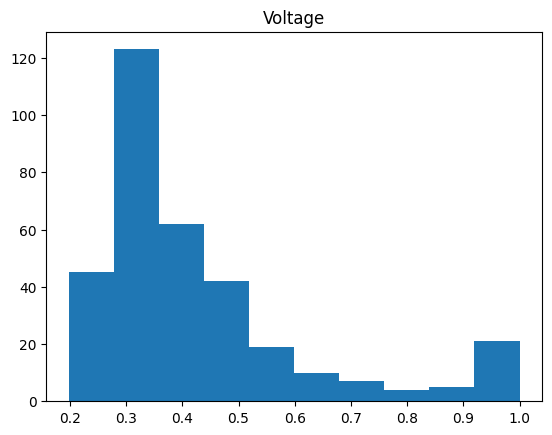

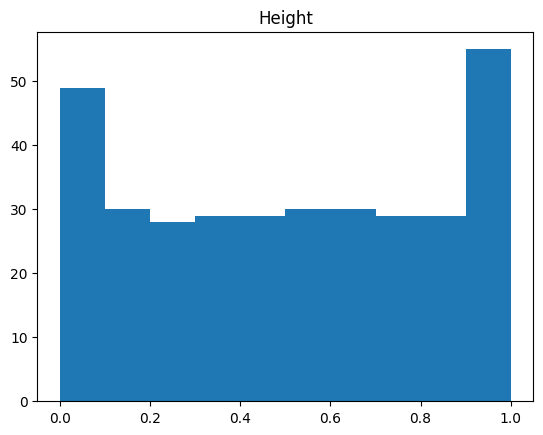

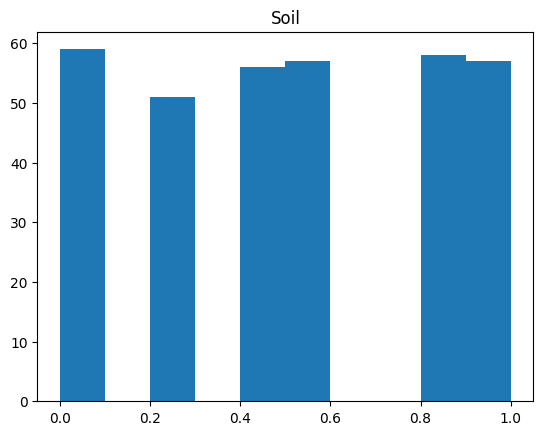

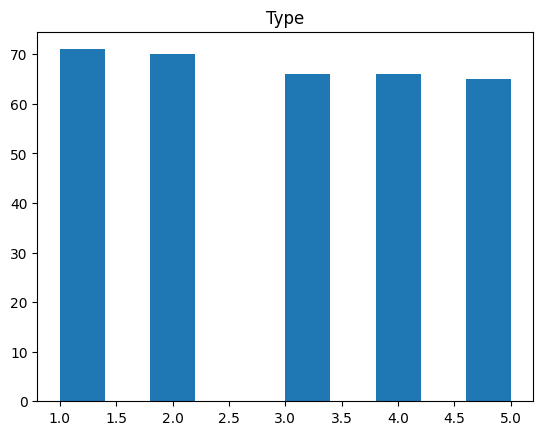

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


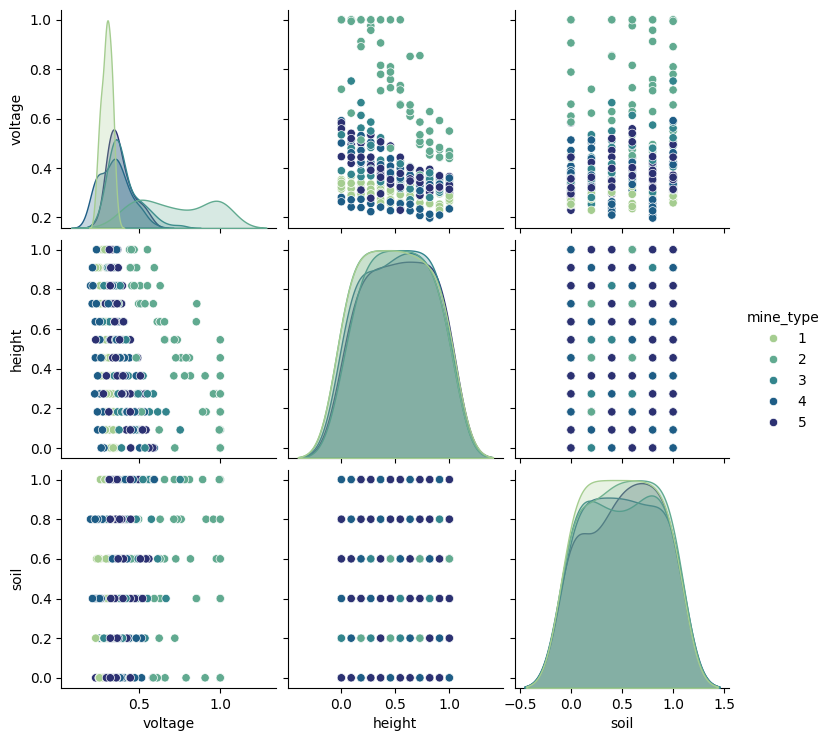

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

uploaded = files.upload()

df = pd.read_csv(next(iter(uploaded)))

print(df.shape)
print(df.head())
print(df.describe())

df['voltage'].hist(grid=False)
plt.title('Voltage')
plt.show()

df['height'].hist(grid=False)
plt.title('Height')
plt.show()

df['soil'].hist(grid=False)
plt.title('Soil')
plt.show()

df['mine_type'].hist(grid=False)
plt.title('Type')
plt.show()

sns.pairplot(df, hue="mine_type", palette='crest')

2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)


In [19]:
y = df['mine_type']
x = df.loc[:,['voltage','height','soil']]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.5, random_state=200)

3. Build a $k$-NN classifier. Explain how you select $k$.


Maximum accuracy:  0.41420118343195267
Optimal k:  [2]


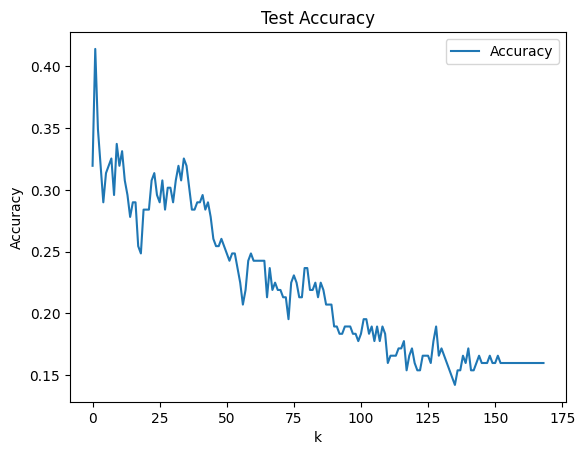

In [20]:
N_train = len(y_train)
N_test = len(y_test)

k_bar = N_train
Acc = np.zeros(k_bar)

for k in range(k_bar):
    model = KNeighborsClassifier(n_neighbors=k+1)
    fitted_model = model.fit(x_train.values,y_train)
    y_hat = fitted_model.predict(x_test.values)
    Acc[k] = np.sum( y_hat == y_test )/N_test
Acc_max = np.max(Acc)
max_index = np.where(Acc==Acc_max)
k_star = max_index[0]+1
print('Maximum accuracy: ', Acc_max)
print('Optimal k: ', k_star)

plt.plot(np.arange(0,k_bar),Acc,label='Accuracy')
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Test Accuracy')
plt.show()

model = KNeighborsClassifier(n_neighbors=k_star[0])
fitted_model = model.fit(x_train.values,y_train)
y_hat = fitted_model.predict(x_test.values)

4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?

In [21]:
print(pd.crosstab(y_hat, y_test))
 # used outputs from example
print('The accuracy is around 40%, which is probably not something you want to risk lives or limbs on.')
print('When 1 is predicted, it is often 1, but often 3,4,5 as well.')
print('When 2 is predicted, the prediction is pretty reliable.')
print('When 3 or 4 are predicted, it could be any of the types.')
print('When 5 is predicted, the results are bad.')

mine_type   1   2   3   4   5
row_0                        
1          23   1  12  14  11
2           0  32   1   5   1
3           9   4  10   9  15
4           4   3   3   4   2
5           1   0   1   3   1
The accuracy is around 40%, which is probably not something you want to risk lives or limbs on.
When 1 is predicted, it is often 1, but often 3,4,5 as well.
When 2 is predicted, the prediction is pretty reliable.
When 3 or 4 are predicted, it could be any of the types.
When 5 is predicted, the results are bad.


5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

I would advise someone to use these predictions for some examples like example 2, but given the outcomes of the others I would advise caution in using it for real world examples.